# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Apartado 1: Clustering

__Número de grupo: 2

__Nombres de los estudiantes: Mario Jiménez, Alejandro Ramírez, David Seijas.

In [4]:
RANDOM_STATE=333

## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `countries_of_the_world.csv` que se proporciona junto con la práctica. Usa como índice el nombre de los países. 

Vamos a eliminar la columna `Region` por ser categórica y todas las filas en las que faltan valores usando la operación `dropna`.

Muestra el dataframe resultante y explica cuántos países y variables contiene.

In [1]:
import pandas as pd
filename = "countries_of_the_world.csv"
#column_names=["Country","Region","Population","Area(sq.mi.)","Pop.Density(per sq. mi.)","Coastline (coast/area ratio)","Net migration",
 #             "Infant mortality (per 1000 births)","GDP ($ per capita)","Literacy (%)","Phones (per 1000)","Arable (%)","Crops (%)"
  #            ,"Other (%)","Climate","Birthrate","Deathrate","Agriculture","Industry","Service"]

df = pd.read_csv(filename)
df = df.set_index("Country")
df = df.drop(["Region"],axis=1)
df = df.dropna(axis=0) #elimina las filas que contengan algun hueco
df

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,
Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
Anguilla,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
Antigua & Barbuda,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,25730435,912050,28.2,0.31,-0.04,22.20,4800.0,93.4,140.1,2.95,0.92,96.13,2.0,18.71,4.92,0.040,0.419,0.541
Vietnam,84402966,329560,256.1,1.05,-0.45,25.95,2500.0,90.3,187.7,19.97,5.95,74.08,2.0,16.86,6.22,0.209,0.410,0.381
Yemen,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393


El dataframe contiene 179 países y 18 variables porque el dataframe es 179x18 

## 2) Análisis de los datos

En este notebook vamos a trabajar con un subconjunto de las variables. Crea un nuevo dataframe que sólo contenga las variables `GDP ($ per capita)`, `Literacy (%)`, `Phones (per 1000)`, `Agriculture`, `Industry` y `Service`. ¿Qué crees que representan cada una de esas variables?

Analiza razonadamente las distribuciones de cada una de las variables (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

In [2]:
df2=df.loc[:,['GDP ($ per capita)','Literacy (%)', 'Phones (per 1000)', 'Agriculture', 'Industry', 'Service']]
df2.describe() #saca las variables

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,9125.698324,81.944134,208.151955,0.156905,0.288028,0.554508
std,9644.123141,19.837537,210.121875,0.151343,0.140310,0.165670
min,500.000000,17.600000,0.200000,0.000000,0.032000,0.062000
25%,1800.000000,69.950000,27.100000,0.039000,0.197000,0.424500
50%,5100.000000,90.900000,137.100000,0.101000,0.274000,0.559000
75%,12950.000000,97.800000,335.000000,0.233000,0.349000,0.668500
max,37800.000000,100.000000,898.000000,0.769000,0.906000,0.954000


#### VARIABLES
1. GDP : producto interior bruto per cápita (medido en dólares).
2. Literacy : porcentaje de personas alfabetas.
3. Phones : móviles por cada 1000 habitantes.
4. Agriculture : porcentaje de sector primario sobre el PIB del país.
5. Industry : porcentaje de sector secundario sobre el PIB del país.
6. Service : porcentaje de sector servicios sobre el PIB del país.


#### DISTRIBUCIONES
1. GDP : Se observa que la desviacion es equivalente a la media, lo que significa que existen muchos países muy pobres al igual que muchos países muy ricos. Se evidencia una gran brecha económica entre los países no desarrollados o del 3er mundo y las potencias desarrolladas.
2. Literacy :  Al contrario de GDP, el indice de alfabetización es muy alto en la mayor parte del mundo. De hecho, a pesar de que el mínimo es un 17% (Níger), el 75% de los países se encuentran por encima del 70% de alfabetización de su población. Se concluye que a excepción de los países más pobres del mundo, en el resto existe un alto porcentaje de alfabetización.
3. Phones : Este índice también separa claramente a países desarrollados y subdesarrollados. La media es un poco engañosa, pues en realidad en el 50% de los países se tienen 137 o menos por cada 1000 habitantes, mientras que en las potencias mundiales sobrepasan los 600, llegando a ser el máximo de 900. Se aprecia una correlación entre GDP y los móviles, lo cual tiene gran sentido. Más adelante lo comprobaremos con algunas gráficas.
4. Sectores : el sector primario es en el que se aprecian mayores variaciones entre los países, aunque en la mayoría de ellos constituye un pequeñisimo porcentaje del PIB; en cuanto al secundario y terciario, no existe una brecha tan grande. De hecho el terciario es en la mayoría el mayor porcentaje del PIB.

In [5]:
#coeficientes de correlación
df2.corr(method='pearson')

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
GDP ($ per capita),1.000000,0.522880,0.883520,-0.616919,0.032855,0.536551
Literacy (%),0.522880,1.000000,0.592042,-0.620514,0.105703,0.474395
Phones (per 1000),0.883520,0.592042,1.000000,-0.631578,-0.084247,0.649638
Agriculture,-0.616919,-0.620514,-0.631578,1.000000,-0.352785,-0.613489
Industry,0.032855,0.105703,-0.084247,-0.352785,1.000000,-0.521413
Service,0.536551,0.474395,0.649638,-0.613489,-0.521413,1.000000


#### OBSERVACIONES
1. Como ya hemos indicado anteriormente, Phones y GDP son las más relacionadas (linealmente, pues el coeficiente de pearson mide la correlación lineal) entre sí; es decir, cuando una aumenta la otra también lo hace. De hecho, esa relación es muy estrecha, pues el valor máximo es de 1.
2. En contraposición con los móviles por cada 1000 habitantes, la agricultura está inversamente relacionada con GDP. En los paises menos desarrollados, con un menor GDP, es el sector primario el motor principal de la economía (muy notable en países asiáticos como Cambodia o Myanmar). De igual forma, también es inversamente proporcional en una medida muy parecida al índice de los móviles, lo cual tiene sentido pues Phones y GDP tienen un coeficiente muy elevado.
3. En cuanto a la alfabetización, no presenta grandes relaciones con ninguna variable. Esto se debe al gran avance de los países más pobres en este aspecto. Quizas nombrar la relación con los móviles, aunque no es muy destacada. Puede tener sentido el hecho de que en países que tienen muchos móviles, la inmensa mayoría de la población es alfabeta.
4. El sector secundario es el menos relacionado con el resto de indicadores. Una razón puede ser su elevada extensión por todos los países. De hecho, son muchas las empresas multinacionales que establecen fábricas en partes más desfavorecidas (buscando el máximo beneficio posible), dato que creemos afecta a este índice. Aunque parezca sorprendente, es con el sector servicio con quien presenta una mayor relación inversa. Puede deberse al crecimiento del sector terciario en los países 1er mundistas e inclusive en fases de desarrollo, que pretenden explotar el turismo internacional.
5. El sector terciario es el gran artíficice de un GDP elevado, como se observa en los tres coeficientes de los sectores con el GDP. De hecho, se observa que al igual que el GDP, los móviles por cada 1000 habitantes es otro indicador de que el sector terciario es el más importante, por lo general.

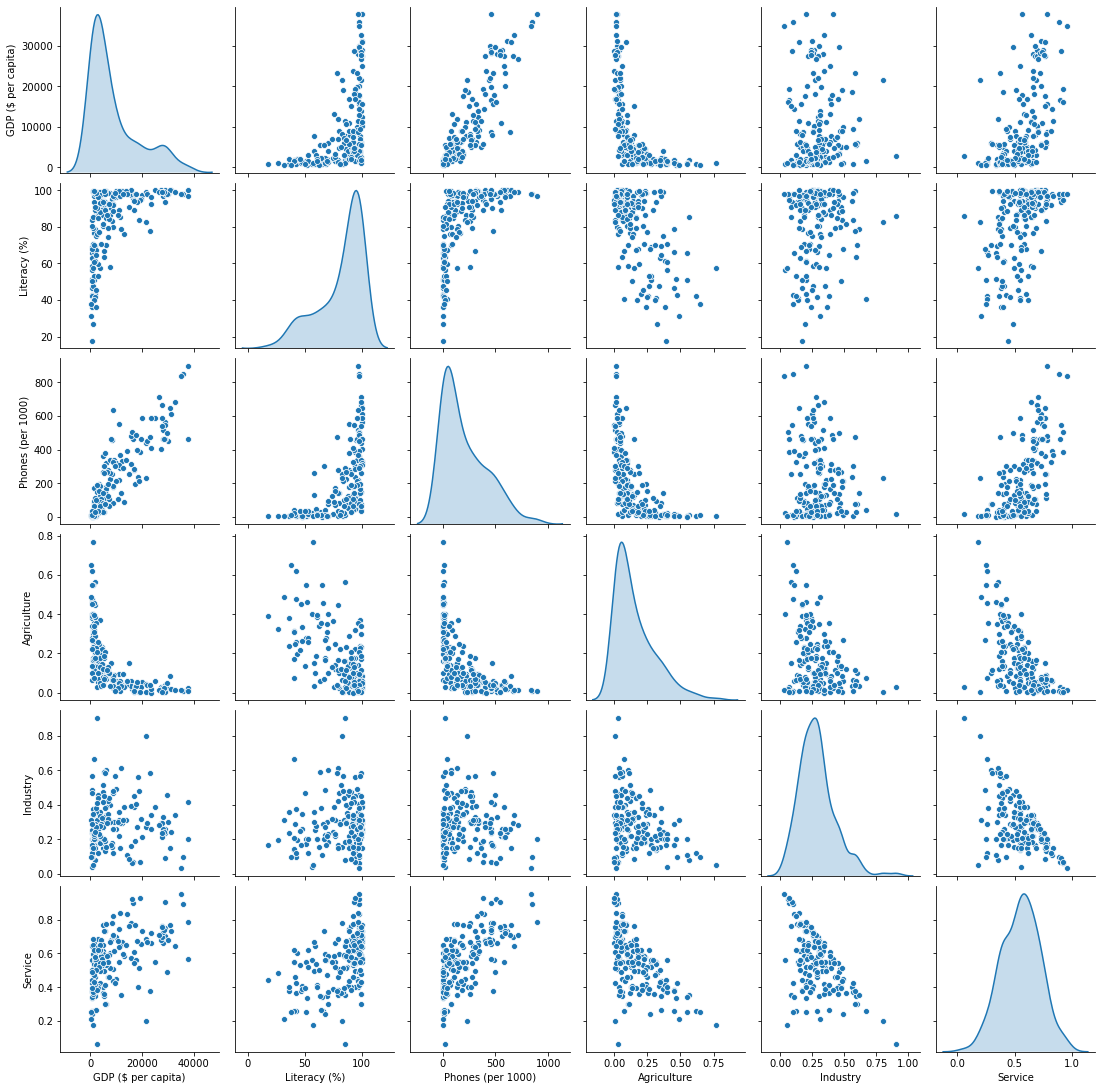

In [7]:
#Diagrama de dispersion

import seaborn as sns
sns.pairplot(df2, diag_kind='kde')

#### OBSERVACIONES
Se confirma lo analizado mediante los coeficientes de correlación y los valores de las distribuciones. De hecho, en la gráfica se observa de forma sencilla las relaciones aclaradas. Por destacar algunas aportaciones: 
1. La mayoría de países tiene un GDP muy bajo. Existe una gran brecha económica entres países desarrollados y no desarrollados. 2. En todos los países desarrollados existe un elevadísimo porcentaje de alfabetización, aunque también en países menos desarrollados. 
3. Phone y GDP guardan una relación muy estrecha (la gráfica se parece a la recta y=x). 
4. Si el sector primario es un notable porcentaje del PIB de cada país, el PIB será muy bajo. 

## 3) Preprocesar los datos

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means para encontrar grupos de países similares, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

#### PREPROCESADO
Es necesario preprocesar los datos, pues al medir distancias entre varias variables podemos obtener resultados sin sentido. Por ejemplo, una distancia de 50 unidades en la variable de Phones no es muy significante, mientras que en otras variables no tiene sentido ya que miden porcentajes (0-1). En este caso distancias muy pequeñas en esta variable van a a marcar la diferencia, lo que es un sin sentido!!!


En el diagrama de dispersión se observa que casi ninguna variable sigue una distribución normal (debe ser simétrica respecto a un punto), si bien es cierto que la formas de las distribuciones tampoco distan demasiado. Por ello, a pesar de que los datos no procedan de una distribución normal, creemos conveniente aplicar el escalado estandarizado.

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaler.fit(df2.values)
S2_scaled = scaler.transform(df2.values)

#scalerMM=MinMaxScaler()
#scalerMM.fit(df2.values)
#S2_scaled=scalerMM.transform(df2.values)

## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula y pinta el diagrama del codo, el índice davies_boulding y el coeficiente silhouette en función del número de clusters.

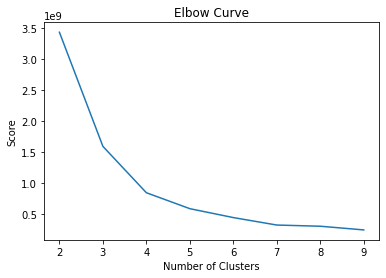

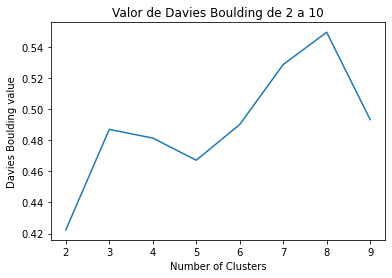

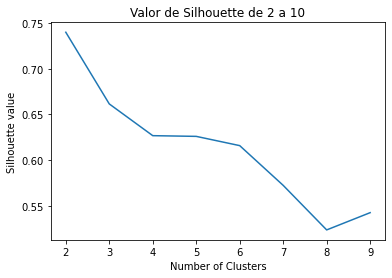

In [61]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score


K_MAX = 10
score = np.zeros(K_MAX-2)
davies_boulding = np.zeros(K_MAX-2)
silhouette = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    km = KMeans(init='random', n_clusters=k, random_state=RANDOM_STATE)
    km.fit(S2_scaled)
    
    score[k-2] = -1 * km.score(S2_scaled)
    davies_boulding[k-2] = davies_bouldin_score(S2_scaled, km.labels_)
    silhouette[k-2] = silhouette_score(S2_scaled, km.labels_)

# diagrama del codo
plt.plot(range(2, K_MAX), score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

# davies boulding
plt.plot(range(2, K_MAX), davies_boulding)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Boulding value')
plt.title('Valor de Davies Boulding de 2 a 10')
plt.show()

# silhouette
plt.plot(range(2, K_MAX), silhouette)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette value')
plt.title('Valor de Silhouette de 2 a 10')
plt.show()

#### OBSERVACIONES
1. En el diagrama del codo se utiliza el indicador score. Score mide la suma de las distancias de cada punto a su cluster, por lo que es mejor cuanto menor sea (clusters más compactos). Sin embargo tampoco nos interesan demasiados clusters. Por lo tanto, el nº de clusters idóneos es donde la gráfica deja de decrementar en exceso. En nuestro caso sería k={4,5}.
2. El valor de Davies_Boulding es la razón entre las distancias intra-cluster y la inter-cluster. Así pues, cuanto menor sea la medida, mejores cluster obtendremos. Los candidatos a k serían {2,4,5}.
3. Silhouette calcula la distancia media al cluster más cercano menos distancia media intra-cluster dividido entre el mayor de ambos. Por lo tanto, cuanto mayor es su valor, más compacta será la agrupación. En este índice los mejores valores son 2 y 3.


#### CONCLUSIONES
Viendo el índice de Davies y el de Silhouette parece razonable escoger 2 clusters. De hecho, se asemeja a la distribución de países en desarrollados y subdesarrollados. Sin embargo, existen países que se encuentran en vías de desarrollo, difícilmente considerados subdesarrollados o 1er mundistas. Esto está relacionado con la alta distancia de los puntos a sus centroides si tenemos 2 clusters. Si no escogemos k=2, el más apropiado estaría entre k=4 y k=5. Viendo los marcadores, 5 clusters parece una mejor agrupación aunque estamos incluyendo un cluster extra, que a veces puede ser innecesario. Además, si seleccionamos 4 clusters, ambos parámetros son prácticamente iguales y la distancia total aumenta muy poco. 

Por lo tanto, nuestra decisión es k=4.

## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior y trata identificar el grupo de países que contienen. Si te han salido más de 3 elige 3 de ellos que sean bastante diferentes entre sí. 

Para hacerlo estudia sus descriptores estadísticos y pinta el diagrama de dispersión en función de cada par de variables usando colores diferentes para cada cluster. ¿Qué clusters se separan mejor y en función de qué variables? ¿y cuáles se confunden más?

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar kMeans con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

In [7]:
from sklearn.cluster import KMeans
km = KMeans(init='random', n_clusters=4, random_state=RANDOM_STATE)
km.fit(S2_scaled)

KMeans(init='random', n_clusters=4, random_state=333)

In [8]:
pd.options.display.max_rows=None #Muestra todas las filas del dataframe
df2 = df2.assign(cluster=pd.Series(data=km.labels_,index=df2.index)) #Añade el cluster al dataframe
df2

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service,cluster
Country,,,,,,,
Afghanistan,700.0,36.0,3.2,0.380,0.240,0.380,0
Albania,4500.0,86.5,71.2,0.232,0.188,0.579,1
Algeria,6000.0,70.0,78.1,0.101,0.600,0.298,3
Anguilla,8600.0,95.0,460.0,0.040,0.180,0.780,2
Antigua & Barbuda,11000.0,89.0,549.9,0.038,0.220,0.743,2
Argentina,11200.0,97.1,220.4,0.095,0.358,0.547,1
Armenia,3500.0,98.6,195.7,0.239,0.343,0.418,1
Aruba,28000.0,97.0,516.1,0.004,0.333,0.663,2
Australia,29000.0,100.0,565.5,0.038,0.262,0.700,2


In [9]:
df2.groupby(["cluster"]).describe().transpose()

cluster                             0             1             2  \
GDP ($ per capita) count    39.000000     73.000000     39.000000   
                   mean   1384.615385   5745.205479  24115.384615   
                   std     627.668393   3927.221279   7832.608575   
                   min     500.000000    700.000000   8600.000000   
                   25%     800.000000   2600.000000  17900.000000   
                   50%    1300.000000   4800.000000  26800.000000   
                   75%    1800.000000   7600.000000  29050.000000   
                   max    2900.000000  16900.000000  37800.000000   
Literacy (%)       count    39.000000     73.000000     39.000000   
                   mean     52.251282     88.963014     97.402564   
                   std      14.939472     10.758014      2.373703   
                   min      17.600000     57.700000     89.000000   
                   25%      41.950000     85.100000     96.850000   
                   50%      51.000000     92.300000     98.000000   
                   75%      63.650000     97.800000     99.000000   
                   max      85.300000     99.900000    100.000000   
Phones (per 1000)  count    39.000000     73.000000     39.000000   
                   mean     10.938462    164.931507    531.579487   
                   std      10.065591    111.509644    139.682933   
                   min       0.200000      7.900000    194.500000   
                   25%       3.450000     74.700000    456.750000   
                   50%       7.900000    137.900000    500.500000   
                   75%      14.350000    262.400000    590.350000   
                   max      45.400000    463.800000    898.000000   
Agriculture        count    39.000000     73.000000     39.000000   
                   mean      0.377308      0.132411      0.027128   
                   std       0.134986      0.086018      0.020071   
                   min       0.172000      0.005000      0.000000   
                   25%       0.277500      0.067000      0.010500   
                   50%       0.353000      0.112000      0.021000   
                   75%       0.452500      0.178000      0.039000   
                   max       0.769000      0.370000      0.086000   
Industry           count    39.000000     73.000000     39.000000   
                   mean      0.205179      0.266918      0.236897   
                   std       0.086204      0.076090      0.103010   
                   min       0.040000      0.088000      0.032000   
                   25%       0.150000      0.207000      0.170000   
                   50%       0.200000      0.276000      0.246000   
                   75%       0.255000      0.315000      0.295500   
                   max       0.381000      0.419000      0.460000   
Service            count    39.000000     73.000000     39.000000   
                   mean      0.417718      0.599356      0.735692   
                   std       0.117600      0.092012      0.106456   
                   min       0.177000      0.360000      0.490000   
                   25%       0.351500      0.547000      0.674500   
                   50%       0.401000      0.591000      0.733000   
                   75%       0.526500      0.651000      0.780000   
                   max       0.620000      0.818000      0.954000   

cluster                              3  
GDP ($ per capita) count     28.000000  
                   mean    7842.857143  
                   std     6436.609907  
                   min      700.000000  
                   25%     3150.000000  
                   50%     5700.000000  
                   75%     9600.000000  
                   max    23200.000000  
Literacy (%)       count     28.000000  
                   mean      83.471429  
                   std       14.470477  
                   min       40.400000  
                   25%       79.250000  
                   50%       85.250000  
   

#### ELECCIÓN
Hemos escogido los tres primeros clusters, que parecen asemejarse a las ideas de los tres tipos de países segun su desarrollo económico. El cuarto cluster parece ser un tipo de país en el que predomina la industria, con un nivel bajo en servicios. En este cluster se encuentran países como China, una de las potencias mundiales, o Turkmenistán, cuyo poder económico es mucho más bajo.


cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: GDP ($ per capita), dtype: object

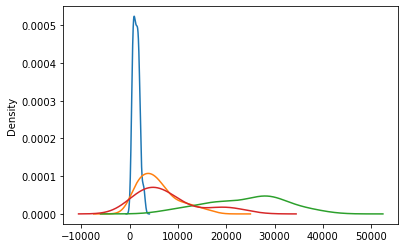

In [10]:
df2.groupby(["cluster"])["GDP ($ per capita)"].plot.density()

#### OBSERVACIONES
Utilizando el PIB per cápita, es posible diferenciar claramente un cluster del resto. El color azul se corresponde con el cluster 0, el de los países más pobres. También se puede diferenciar el de los países más ricos (cluster 2 - color verde), aunque se entremezcla un poco con el cluster 3 (color rojo), asociado a los países con una fuerte industria.

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Literacy (%), dtype: object

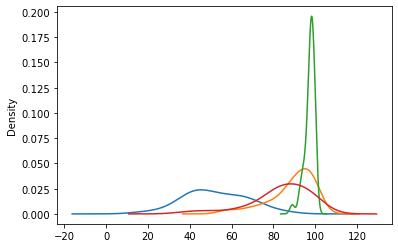

In [11]:
df2.groupby(["cluster"])["Literacy (%)"].plot.density()

#### OBSERVACIONES
Utilizando el porcentaje de población alfabeta, se advierte una enorme separación entre el cluster de los países más desarrollados y el resto. Sin embargo, esta variable no permite separar los clusters 1 y 3. Para ello recurrimos a otras variables.

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Phones (per 1000), dtype: object

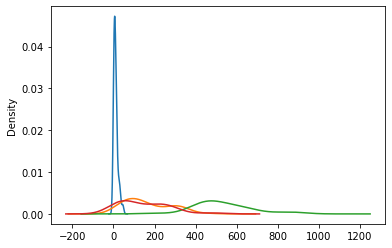

In [12]:
df2.groupby(["cluster"])["Phones (per 1000)"].plot.density()

#### OBSERVACIONES
La variable Phones da la misma información que la del GDP, aunque en este caso es todavía más evidente la diferencia entre los países menos desarrollados y los más desarrollados. Al igual que en las variables anteriores, los clusters 1 y 3 siguen sin diferenciarse.

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Agriculture, dtype: object

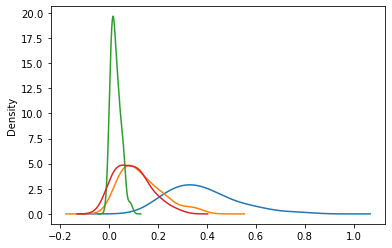

In [13]:
df2.groupby(["cluster"])["Agriculture"].plot.density()

#### OBSERVACIONES
Mismo caso que la alfabetización, solo que en esta variable son las potencias mundiales las que presentan los valores más bajos.

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Industry, dtype: object

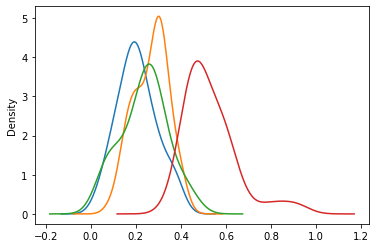

In [14]:
df2.groupby(["cluster"])["Industry"].plot.density()

#### OBSERVACIONES
Gracias al sector secundario se distinguen con claridad el cluster 1 y el 3. Como hemos mencionado anteriormente, se advierte que el cluster 3 es el asociado a los países con una gran industria (por lo general suele ser países en los que la industria textil es el factor principal de su economía). A diferencia del resto de variables analizadas, el cluster de los países más pobres y los más ricos se diferencian muy poco.

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Service, dtype: object

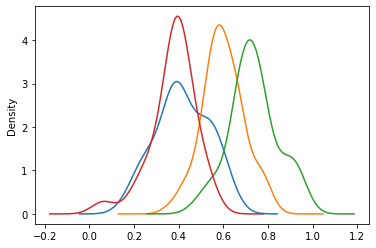

In [15]:
df2.groupby(["cluster"])["Service"].plot.density()

#### OBSERVACIONES
Al igual que sucedía con el sector secundario, el sector terciario consigue una buena separación de los clusters 1, 2 y 3; siendo el de los países más ricos el que presenta una mayor actividad asociada a los servicios. Por el contrario, el cluster de las potencias industriales tiene los valores más bajos en el sector servicios, junto con los países subdesarrollados.

### CONCLUSIÓN
Claramente, el grupo de los paises menos desarrollados (color auzl) y el de las primeras potencias mundiales (color verde) son los que mejor se separan. Se observa muy bien en las cuatro primeras variables, ya que en PIB y phones el azul es muy diferente al resto; y en agricultura y alfabetización sucede lo mismo con los países más ricos. Para diferenciar los otros dos clusters, tenemos que recurrir a las dos últimas variables, la industria y el sector servicios, ya que en las otras son apenas indistinguibles. Por lo tanto, estos dos clusters son los más fáciles de confundir